G: 70574804602.83188
(10, 7.0574804602831875)
dG:23526581723.44267
(10, 2.3526581723442668)
D:0.008882746784642724
dD:0.004187543282654347
theta_x_mess :9.950935657631143e-05 ; dtheta_x_mess :0.00014469704173250813
theta_x_theo :7.188501777604167e-05 ; dtheta_x_theo :5.4671735237241544e-05
1.3842850659971122
theta_mess 9.950935657631143e-05
theta_s 0.00014469704173250813
[8.57 8.26 8.47 8.39 8.35 8.26 8.6  8.32 8.4  8.39]


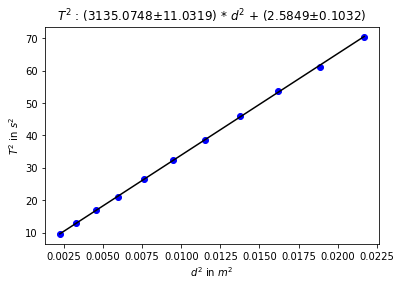

In [6]:
from scipy import stats
import math
import numpy as np
from matplotlib import pyplot as plt
from lmfit import report_fit
from lmfit.models import LinearModel
from scipy.optimize import curve_fit

def split(value):
    """Gibt die gerundete Mantisse und den Exponenten in der 10er Basis wieder für Postitive werte
    
    Parameter
        value(float)
    Wiedergabe
        exp(int):
    """
    try:
        exp=int(math.log10(value))
        man=value/10**exp
        return exp,man
    except:
        print("Error mit "+str(value))
#zylinder
m=0.3527
dm=5*10**(-5)
h=0.0346
dh=5*10**(-5)
ri=0.00805/2
dr=5*10**(-5)/2
ra=0.04/2
#draht
l1=0.1885
dl=0.0005
l2=0.2180
R=0.3/1000
dR=5*10**(-5)/2


#Ts
T0=np.array([131,128,139,130,133,126,124,137,128,128])/100
T1=np.array([3.03,3.11,3.12,3.07,3.15,2.99,3.20,2.94,3.03,3.21])
T2=np.array([3.50,3.65,3.65,3.51,3.59,3.63,3.63,3.40,3.63,3.59])
T3=np.array([4.07,4.20,4.10,4.12,4.10,4.06,4.05,4.14,4.06,4.24])
T4=np.array([445,466,466,455,477,459,456,453,456,457])/100
T5=np.array([513,503,518,519,519,523,509,506,521,521])/100
T6=np.array([567,554,565,573,565,574,563,581,562,577])/100
T7=np.array([616,620,623,600,655,616,610,617,643,614])/100
T8=np.array([675,667,656,695,689,658,688,673,689,704])/100
T9=np.array([732,747,736,730,707,760,727,720,746,721])/100
T10=np.array([776,794,792,779,796,759,802,798,767,756])/100
T11=np.array([857,826,847,839,835,826,860,832,840,839])/100

Tali=np.array([25.99,29.25,34.94,39.66,44.97,55.68,(60+11.62)])/10
dali=np.array([38,46,57,67,76,98,126])/1000


#Reg's machen
def fit(x,y,err):
    weights=1/err
    model = LinearModel(independent_vars=['x'])
    result=model.fit(data=y,x=x,weights=weights)
    v=[] #values
    s=[] #stderr
    #0:slope 1
    for name, param in result.params.items():
        v.append(param.value)
        if(param.stderr==None):
            s.append(0)
        else:
            s.append(param.stderr)
    return v,s
T_err=np.array([stats.sem(T1),stats.sem(T2),stats.sem(T3),
                stats.sem(T4),stats.sem(T5),stats.sem(T6),
                stats.sem(T7),stats.sem(T8),stats.sem(T9),
                stats.sem(T10),stats.sem(T11)])

T=np.array([np.mean(T1),np.mean(T2),np.mean(T3),
            np.mean(T4),np.mean(T5),np.mean(T6),
            np.mean(T7),np.mean(T8),np.mean(T9),
            np.mean(T10),np.mean(T11)])

d=np.arange(start=4.73,step=1,stop=15.73)/100

def MODEL

#T=Tali
#d=dali
#T_err=T_err[:7]

Tsq=np.square(T)
dsq=np.square(d)


plt.plot(dsq, Tsq, "ok",color="blue")
reg = fit(dsq,Tsq,T_err)
plt.plot(dsq, (reg[0][0]*dsq+reg[0][1]), color="k")
plt.xlabel("$d^2$ in $m^2$")
plt.ylabel("$T^2$ in $s^2$")
plt.title("$T^2$ : ({:.4f}$\pm${:.4f}) * $d^2$ + ({:.4f}$\pm${:.4f})".format(reg[0][0],reg[1][0],reg[0][1],reg[1][1]))
plt.savefig("tor.png")

G=((16*math.pi*m)/((reg[0][0])*(R)**4*(1/l1+1/l2)))
print(f"G: {G}")
print(split(G))

dG=G*math.sqrt((dm/m)**2+
                (-reg[1][0]/reg[0][0])**2+
                (-4*dR/R)**2+((l2*dl)/(l1*(l1+l2)))**2+
                ((l1*dl)/(l2*(l1+l2)))**2)
print(F"dG:{dG}")
print(split(dG))

theta_mess=(reg[0][1]*G*R**4*(1/l1+1/l2))/(8*math.pi)
dtheta_mess=theta_mess*math.sqrt((reg[1][1]/reg[0][1])**2+
                                (dG/G)**2+
                                (4*dR/R)**2+
                                (-dl/(l1**2*(1/l1+1/l2)))**2+
                                (-dl/(l2**2*(1/l1+1/l2)))**2)


D=math.pi*G*(R**4)/(2)*(1/l1+1/l2)
dD=D*math.sqrt((dG/G)**2+
               (4*dR/R)**2+
               (-dl/(l1**2*(1/l1+1/l2)))**2+
               (-dl/(l2**2*(1/l1+1/l2)))**2)
print(F"D:{D}")
print(F"dD:{dD}")





theta_s=(np.mean(T0)**2*D)/(4*math.pi**2)
dtheta_s=theta_s*math.sqrt((2*stats.sem(T0)/np.mean(T0))**2+(dD/D)**2)

theta_x_mess=(theta_mess-theta_s)/2

dtheta_x_mess=theta_x_mess*math.sqrt((dtheta_mess/(theta_mess-theta_s))**2+(-dtheta_s/(theta_mess-dtheta_s))**2)

theta_x_theo=m/4*(ra**2+ri**2+((h**2)/3))
dtheta_x_theo=theta_x_theo*math.sqrt((dm/m)**2+
                                    ((2*ra*dr)/(ra**2+h**2/3+ri**2))**2+
                                    ((2*ri*dr)/(ra**2+h**2/3+ri**2))**2+
                                    ((2*h*dh)/(3*(ra**2+h**2/3+ri**2))**2))



print(f"theta_x_mess :{theta_x_mess} ; dtheta_x_mess :{dtheta_x_mess}")
print(f"theta_x_theo :{theta_x_theo} ; dtheta_x_theo :{dtheta_x_theo}")
print(theta_x_mess/theta_x_theo)

print(f"theta_mess {theta_x_mess}")

print(f"theta_s {dtheta_x_mess}")
    
print(T11)